# Data extraction

![texto alternativo](https://worldview.stratfor.com/sites/default/files/styles/article_full/public/cryptocurrency-gulf-display-shutterstock-1028639176.png?itok=K36RQG5A.jpg)

## Extracting (web scraping) daily data from top 200 cryptocurrencies available at  https://coinmarketcap.com/coins/ but also you can find more datasets with data by hour at https://www.cryptodatadownload.com/data/

In [1]:
# ► First libs

import plotly.express as px 
import pandas as pd
import re

In [2]:
# ► Scraping main table wit pandas

url = 'https://coinmarketcap.com/coins/views/all/'
df = pd.read_html(url)[2]
df.head()

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,1,Bitcoin,BTC,"$219,983,110,390","$11,916.05","18,461,081 BTC","$24,912,473,124",0.15%,1.27%,2.68%,NaN
1,2,Ethereum,ETH,"$49,551,882,478",$441.70,"112,183,882 ETH","$14,846,272,752",0.85%,3.40%,16.29%,NaN
2,3,XRP,XRP,"$13,553,878,557",$0.301742,"44,918,719,274 XRP *","$2,214,633,821",-0.35%,1.60%,2.52%,NaN
3,4,Bitcoin Cash,BCH,"$5,549,748,038",$300.15,"18,489,931 BCH","$1,969,572,915",-0.10%,1.14%,-0.97%,NaN
4,5,Bitcoin SV,BSV,"$3,973,457,386",$214.91,"18,488,515 BSV","$940,679,017",-0.22%,-0.14%,-6.31%,NaN


In [3]:
# ► Getting rid of '$,' 

df.Price = df['Price'].apply(lambda x: float(re.sub('([$,]*)','',x)))
df.sort_values(by=['Price'], inplace=True, ascending=False)

In [4]:
# ► Below Bitcoin is omitted because its price is too high to appreciate the rest of the coins

fig = px.bar(df[1:], y='Price', x='Name', text='Name')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(template='seaborn', title='Coins available for scraping')
fig.show()

In [5]:
coins_available = list(df.Name)

In [6]:
# ► Repacing ' ' and '.' for '-' and deleting '[]#'  

coins_available = [re.sub('([\s+.])','-',coin.lower()).replace('[','').replace(']','').replace('#','') for coin in coins_available]

In [7]:
print(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'dash', 'monero', 'bitcoinpos', 'zcash', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'counos-x', 'salus', 'decred', 'neo', 'kusama', 'energy-web-token', 'bitcoin-gold', 'horizen', 'newyork-exchange', 'largo-coin', 'mimblewimblecoin', 'zcoin', 'ethereum-classic', 'cosmos', 'chainx', 'platincoin', 'counos-coin', 'bitcoinhd', 'ddkoin', 'tezos', 'eos', 'waves', 'solana', 'qtum', 'ghostprism', 'zenon', 'elastos', 'celo', 'vitae', 'btse', 'energi', 'monacoin', 'serum', 'cryptonex', 'lisk', 'factom', 'zynecoin', 'hypercash', 'haven-protocol', 'tomochain', 'blocknet', 'stakecubecoin', 'nano', 'dero', 'deviantcoin', 'bitcoin-diamond', 'ontology', 'particl', 'komodo', 'baer-chain', 'bhpcoin', 'polis', 'skycoin', 'gxchain', 'neblio', 'bitcoin-2', 'algorand', 'stratis', 'aidos-kuneen', 'grin', 'insolar', 'fusion', 'loki', 'ouroboros', 'beam', 'icon', 'nebulas', 'pivx', 'terra', 'ark', 'nuls', 'aeon', 'stakenet', 'ergo', 'namec

## Function to obtain some data coins like 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'.



In [9]:
# ► More libraries

import datetime 
import csv

In [10]:
# ► Function 

def get_data(coins_available):
 
  '''This function gives general data from one coin'''
  # ► User types a number

  print(coins_available)
  coin_name = input('Type a valid coin name: ').lower()

  while True:

    if coin_name not in coins_available:
      print('Coin name should not contain spaces instead use "-" and type all in lowercase')
      coin_name = input('Type again a valid coin name: ').lower()
    else:
      break
  
  # ► Scrapping any coin from
  today = datetime.date.today()  # todays date
  mktcap_page = 'https://coinmarketcap.com/currencies/'+ coin_name +'/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
  full_data = pd.read_html(mktcap_page)[2]
  full_data.rename(columns={'Open*': 'Open', 'Close**': 'Close'}, inplace=True)

  # ► This function replaces ',' for nothing and then changes data type from object to float

  def obj_to_num(df,cols):
      
      def obj_to_num(row):
          if ',' in str(row):
            row = row.replace(',','')
            return float(row)
          else:
            return float(row)

      for col in cols:     
          df[col] = df[col].apply(obj_to_num) 

      return df

  # ► This function changes data column (object) to timestamp[ns] and also can change all dataframe clumns to float 

  def prepare_data(file):
  
    columns = ['Open','High','Low','Close','Volume','Market Cap']
    file['Date'] = pd.to_datetime(file['Date'])
    num_data = obj_to_num(file,columns)

    return num_data

  return prepare_data(full_data)


## Coin exploration (Ethereum in this case)

In [11]:
# ► Type the coin name you want

my_coin = get_data(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'dash', 'monero', 'bitcoinpos', 'zcash', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'counos-x', 'salus', 'decred', 'neo', 'kusama', 'energy-web-token', 'bitcoin-gold', 'horizen', 'newyork-exchange', 'largo-coin', 'mimblewimblecoin', 'zcoin', 'ethereum-classic', 'cosmos', 'chainx', 'platincoin', 'counos-coin', 'bitcoinhd', 'ddkoin', 'tezos', 'eos', 'waves', 'solana', 'qtum', 'ghostprism', 'zenon', 'elastos', 'celo', 'vitae', 'btse', 'energi', 'monacoin', 'serum', 'cryptonex', 'lisk', 'factom', 'zynecoin', 'hypercash', 'haven-protocol', 'tomochain', 'blocknet', 'stakecubecoin', 'nano', 'dero', 'deviantcoin', 'bitcoin-diamond', 'ontology', 'particl', 'komodo', 'baer-chain', 'bhpcoin', 'polis', 'skycoin', 'gxchain', 'neblio', 'bitcoin-2', 'algorand', 'stratis', 'aidos-kuneen', 'grin', 'insolar', 'fusion', 'loki', 'ouroboros', 'beam', 'icon', 'nebulas', 'pivx', 'terra', 'ark', 'nuls', 'aeon', 'stakenet', 'ergo', 'namec

In [12]:
my_coin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-08-14,428.68,444.58,423.35,437.40,1.506459e+10,4.906847e+10
1,2020-08-13,390.84,432.90,379.71,428.74,1.848030e+10,4.809157e+10
2,2020-08-12,380.06,391.31,367.92,391.02,1.240877e+10,4.385550e+10
3,2020-08-11,395.89,398.48,370.86,380.38,1.279222e+10,4.265695e+10
4,2020-08-10,391.04,399.38,391.04,395.89,1.168583e+10,4.439014e+10


In [13]:
my_coin.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Open'],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['High'],
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Low'],
                    mode='lines',
                    name='Low'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Close'],
                    mode='lines',
                    name='Close'))

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title="Coin behavior from its beginning, price in USD")

fig.show()

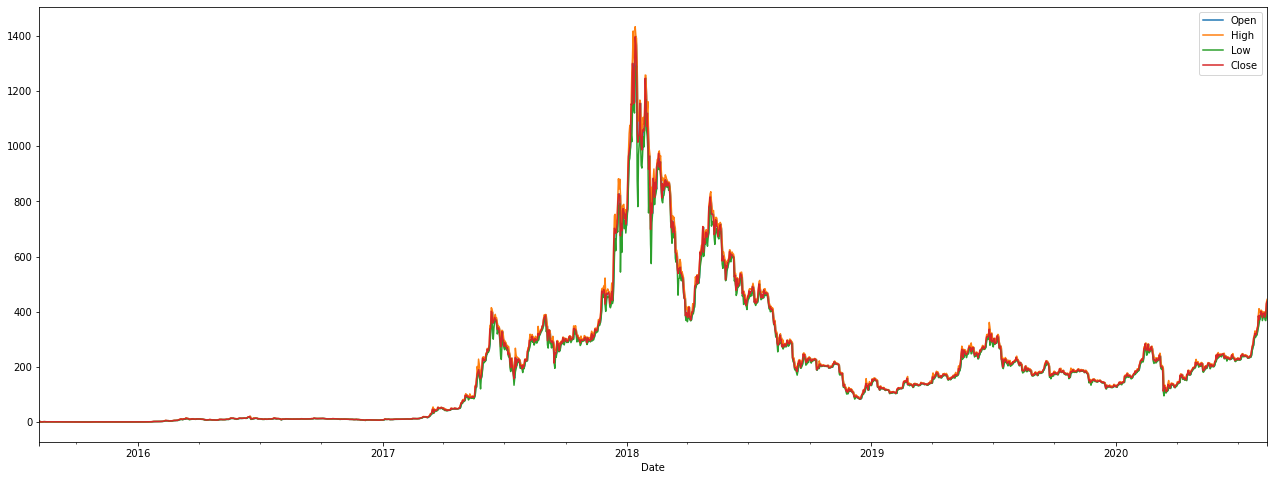

In [15]:
my_coin_graph = my_coin.set_index('Date') 
_ = my_coin_graph[['Open','High','Low','Close']].plot(figsize=(22, 8))